<a href="https://colab.research.google.com/github/FernandoElizarraras7/SIMULACION-I/blob/main/OTRAS_APLICACIONES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEMA 5.7
Un vendedor de revistas compra mensualmente una revista el día primero de cada mes. El costo de cada ejemplar es de \$1.50. La demanda de esta revista en los primeros 10 días del mes sigue la siguiente distribución de probabilidad:
$$\begin{matrix}
Demanda & 5 & 6 & 7 & 8 & 9 & 10 & 11 \\
Probabilidad & 0.05 & 0.05 & 0.10 & 0.15 & 0.25 & 0.25 & 0.15
\end{matrix}$$

Al final del décimo día, el vendedor puede regresar cualquier cantidad al proveedor, quien se las pagará a \$0.90 el ejemplar, o comprar más a \$1.20 el ejemplar. La demanda en los siguientes 20 días está dada por la siguiente distribución de probabilidad:
$$\begin{matrix}
Demanda & 4 & 5 & 6 & 7 & 8 \\
Probabilidad & 0.15 & 0.20 & 0.30 & 0.20 & 0.15
\end{matrix}$$

Al final del mes, el vendedor puede regresar al proveedor las revistas que le sobren, las cuales se le pagarán a \\$0.60 el ejemplar. Finalmente, se asume que después de un mes ya no existe demanda por parte del público, puesto que para ese entonces ya habrá aparecido el nuevo número de la revista. Si el precio al público es de \$2 por ejemplar, determine la política óptima de compra.

La mejor política de compra es comprar 10 ejemplares inicialmente y 10 ejemplares adicionales.
El beneficio esperado es de: $17.88


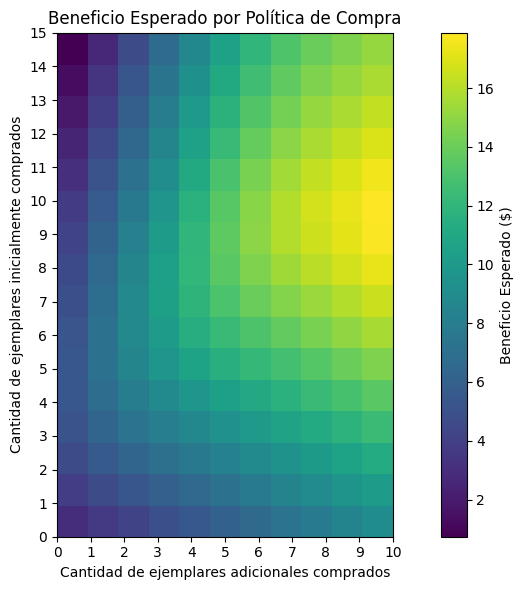

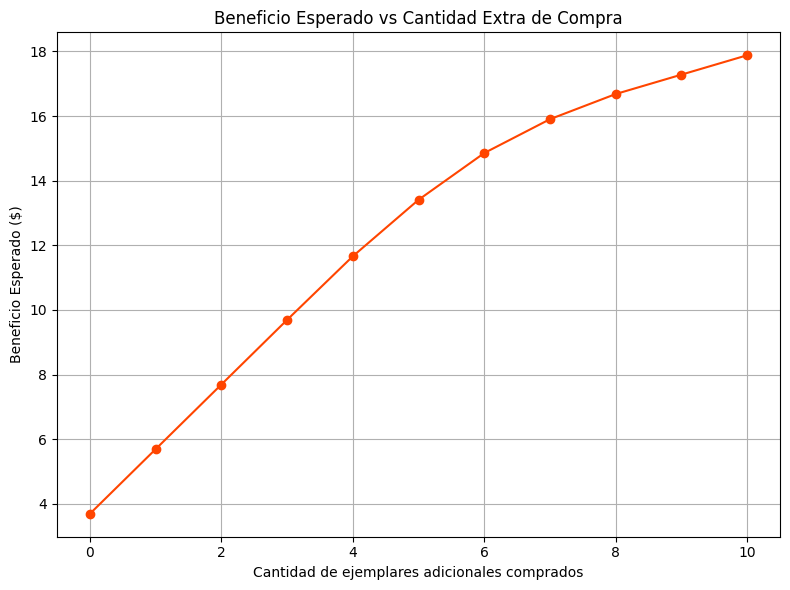

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las distribuciones de probabilidad
demanda_10_dias = [5, 6, 7, 8, 9, 10, 11]
prob_10_dias = [0.05, 0.05, 0.10, 0.15, 0.25, 0.25, 0.15]

demanda_20_dias = [4, 5, 6, 7, 8]
prob_20_dias = [0.15, 0.20, 0.30, 0.20, 0.15]

# Definimos los costos y precios
costo_compra_inicial = 1.50
costo_compra_extra = 1.20
precio_venta = 2.00
precio_devolucion_10_dias = 0.90
precio_devolucion_fin_mes = 0.60

# Función para calcular el beneficio esperado para una política de compra dada
def calcular_beneficio_esperado(inicial, extra):
    beneficio_total = 0

    # Simulamos la demanda de los primeros 10 días
    for d10, p10 in zip(demanda_10_dias, prob_10_dias):
        ventas_10 = min(inicial, d10)
        devoluciones_10 = max(0, inicial - d10)
        compra_extra = max(0, d10 - inicial)

        # Calculamos el beneficio de los primeros 10 días
        beneficio_10 = ventas_10 * precio_venta - inicial * costo_compra_inicial
        if compra_extra > 0:
            beneficio_10 -= compra_extra * costo_compra_extra
        if devoluciones_10 > 0:
            beneficio_10 += devoluciones_10 * precio_devolucion_10_dias

        # Simulamos la demanda de los siguientes 20 días
        for d20, p20 in zip(demanda_20_dias, prob_20_dias):
            ventas_20 = min(extra + compra_extra, d20)
            devoluciones_20 = max(0, extra + compra_extra - d20)

            # Calculamos el beneficio de los siguientes 20 días
            beneficio_20 = ventas_20 * precio_venta
            if devoluciones_20 > 0:
                beneficio_20 += devoluciones_20 * precio_devolucion_fin_mes

            # Sumamos el beneficio ponderado por las probabilidades
            beneficio_total += (beneficio_10 + beneficio_20) * p10 * p20

    return beneficio_total

# Probamos diferentes cantidades de compra inicial y extra
max_compra_inicial = 15
max_compra_extra = 10
mejor_beneficio = -np.inf
mejor_politica = (0, 0)
beneficios = np.zeros((max_compra_inicial + 1, max_compra_extra + 1))

for inicial in range(max_compra_inicial + 1):
    for extra in range(max_compra_extra + 1):
        beneficio = calcular_beneficio_esperado(inicial, extra)
        beneficios[inicial, extra] = beneficio
        if beneficio > mejor_beneficio:
            mejor_beneficio = beneficio
            mejor_politica = (inicial, extra)

print(f"La mejor política de compra es comprar {mejor_politica[0]} ejemplares inicialmente y {mejor_politica[1]} ejemplares adicionales.")
print(f"El beneficio esperado es de: ${mejor_beneficio:.2f}")

# Graficar el beneficio esperado para cada combinación de compra inicial y extra
plt.figure(figsize=(10, 6))
plt.imshow(beneficios, origin='lower', cmap='viridis', extent=[0, max_compra_extra, 0, max_compra_inicial])
plt.colorbar(label='Beneficio Esperado ($)')
plt.xlabel('Cantidad de ejemplares adicionales comprados')
plt.ylabel('Cantidad de ejemplares inicialmente comprados')
plt.title('Beneficio Esperado por Política de Compra')
plt.xticks(np.arange(0, max_compra_extra + 1, 1))
plt.yticks(np.arange(0, max_compra_inicial + 1, 1))
plt.grid(False)
plt.tight_layout()
plt.show()

# Generar datos de beneficio esperado para diferentes cantidades de extra compradas
beneficio_por_extra = [calcular_beneficio_esperado(mejor_politica[0], extra) for extra in range(max_compra_extra + 1)]

# Gráfico de líneas del beneficio esperado por cantidad extra comprada
plt.figure(figsize=(8, 6))
plt.plot(range(max_compra_extra + 1), beneficio_por_extra, marker='o', linestyle='-', color='orangered')
plt.xlabel('Cantidad de ejemplares adicionales comprados')
plt.ylabel('Beneficio Esperado ($)')
plt.title('Beneficio Esperado vs Cantidad Extra de Compra')
plt.grid(True)
plt.tight_layout()
plt.show()

# SIMULACION MONTE CARLO
Para mejorar el modelo, se podría considerar una mayor granularidad en las políticas de compra, ajustando los rangos y pasos de las iteraciones para obtener resultados más precisos. Además, se podría incluir una simulación de Monte Carlo para considerar más escenarios y obtener una estimación más robusta del beneficio esperado. La simulación de Monte Carlo es una técnica poderosa que se puede usar para comprender el comportamiento de un sistema complejo mediante la simulación de diferentes escenarios y la evaluación de los resultados de manera estadística. En el contexto del problema, una simulación de Monte Carlo puede ayudar a obtener una estimación más precisa del beneficio esperado al considerar la variabilidad en la demanda y las probabilidades asociadas.
## Beneficios de usar Monte Carlo
1.   **Captura de Variabilidad:** Te permite modelar la incertidumbre en la demanda de una manera más realista, ya que generas muchas simulaciones con diferentes resultados posibles.
2.   **Distribución de Resultados:** En lugar de obtener un solo valor esperado, puedes obtener una distribución de posibles beneficios, lo que te ayuda a comprender mejor el rango de posibles resultados.
3. **Evaluación de Riesgos:** Puedes evaluar la probabilidad de obtener beneficios por debajo de un umbral específico, lo cual es útil para la toma de decisiones bajo incertidumbre.
4. **Robustez:** Captura la variabilidad e incertidumbre inherente a la demanda.
5. **Detallada:** Proporciona una distribución completa de posibles resultados, no solo un promedio.
6. **Visualización:** Permite visualizar la dispersión y el riesgo asociado con las diferentes políticas de compra.



La mejor política de compra es comprar 10 ejemplares inicialmente y 10 ejemplares adicionales.
El beneficio esperado es de: $17.88


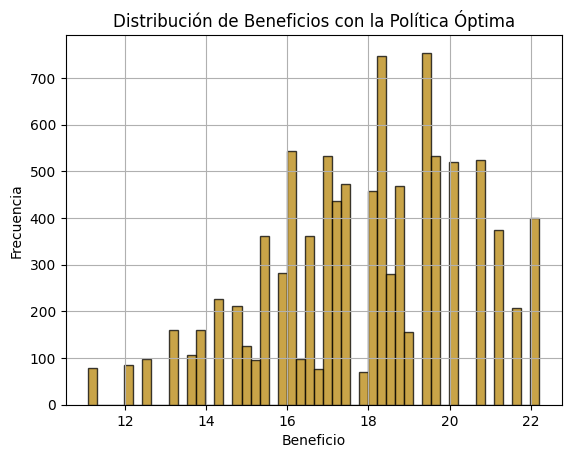

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las distribuciones de probabilidad y parámetros del problema
demanda_10_dias = [5, 6, 7, 8, 9, 10, 11]
prob_10_dias = [0.05, 0.05, 0.10, 0.15, 0.25, 0.25, 0.15]

demanda_20_dias = [4, 5, 6, 7, 8]
prob_20_dias = [0.15, 0.20, 0.30, 0.20, 0.15]

costo_compra_inicial = 1.50
costo_compra_extra = 1.20
precio_venta = 2.00
precio_devolucion_10_dias = 0.90
precio_devolucion_fin_mes = 0.60

# Función para calcular el beneficio para un escenario de demanda dado
def calcular_beneficio(inicial, extra, demanda_10, demanda_20):
    ventas_10 = min(inicial, demanda_10)
    devoluciones_10 = max(0, inicial - demanda_10)
    compra_extra = max(0, demanda_10 - inicial)

    beneficio_10 = ventas_10 * precio_venta - inicial * costo_compra_inicial
    if compra_extra > 0:
        beneficio_10 -= compra_extra * costo_compra_extra
    if devoluciones_10 > 0:
        beneficio_10 += devoluciones_10 * precio_devolucion_10_dias

    ventas_20 = min(extra + compra_extra, demanda_20)
    devoluciones_20 = max(0, extra + compra_extra - demanda_20)

    beneficio_20 = ventas_20 * precio_venta
    if devoluciones_20 > 0:
        beneficio_20 += devoluciones_20 * precio_devolucion_fin_mes

    beneficio_total = beneficio_10 + beneficio_20
    return beneficio_total

# Simulación de Monte Carlo
def simulacion_monte_carlo(inicial, extra, num_simulaciones=10000):
    beneficios = []
    for _ in range(num_simulaciones):
        demanda_10 = np.random.choice(demanda_10_dias, p=prob_10_dias)
        demanda_20 = np.random.choice(demanda_20_dias, p=prob_20_dias)
        beneficio = calcular_beneficio(inicial, extra, demanda_10, demanda_20)
        beneficios.append(beneficio)
    return beneficios

# Probar diferentes cantidades de compra inicial y extra
max_compra_inicial = 15
max_compra_extra = 10
mejor_beneficio_medio = -np.inf
mejor_politica = (0, 0)

for inicial in range(max_compra_inicial + 1):
    for extra in range(max_compra_extra + 1):
        beneficios = simulacion_monte_carlo(inicial, extra)
        beneficio_medio = np.mean(beneficios)
        if beneficio_medio > mejor_beneficio_medio:
            mejor_beneficio_medio = beneficio_medio
            mejor_politica = (inicial, extra)

print(f"La mejor política de compra es comprar {mejor_politica[0]} ejemplares inicialmente y {mejor_politica[1]} ejemplares adicionales.")
print(f"El beneficio esperado es de: ${mejor_beneficio_medio:.2f}")

# Graficar distribución de beneficios
beneficios_optimos = simulacion_monte_carlo(mejor_politica[0], mejor_politica[1])
plt.hist(beneficios_optimos, bins=50, alpha=0.75, color='darkgoldenrod', edgecolor='black')
plt.xlabel('Beneficio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Beneficios con la Política Óptima')
plt.grid(True)
plt.show()


# CONCLUSIONES
1.   **Política Óptima de Compra:** El análisis identificó la política óptima de compra inicial y compra adicional que maximiza el beneficio esperado. Esto es crucial para tomar decisiones informadas sobre la cantidad de revistas a adquirir y cuándo hacer compras adicionales.
2.   **Beneficio Esperado:** El beneficio esperado varía significativamente según la política de compra adoptada. Una política bien ajustada puede maximizar los ingresos y minimizar las pérdidas, especialmente en un entorno de demanda incierta.
3. **Importancia de la Simulación:** La simulación Monte Carlo permitió evaluar la variabilidad y el riesgo asociados con diferentes políticas de compra, proporcionando una visión más robusta que un simple análisis determinista.

# COMENTARIOS ADICIONALES
*   **Simulación Monte Carlo:** La inclusión de una simulación Monte Carlo es fundamental para capturar la incertidumbre inherente en la demanda de revistas. Esta técnica permite evaluar el impacto de diferentes escenarios de demanda y ajustar la política de compra en consecuencia.
*   **Visualización:** Los gráficos de distribución de beneficios ayudan a visualizar la variabilidad de los beneficios y a entender mejor las posibles ganancias y riesgos asociados con la política óptima. Esto facilita la comunicación de los resultados y apoya la toma de decisiones.
* **Ajuste de Parámetros:** La flexibilidad del código permite ajustar los parámetros de costos y precios para adaptarse a diferentes contextos de mercado. Esto es importante para empresas que operan en mercados dinámicos donde los costos y precios pueden cambiar.
* **Optimización Continua:** Es recomendable revisar y ajustar la política de compra periódicamente, especialmente si hay cambios significativos en las condiciones del mercado o en la estructura de costos. La simulación Monte Carlo puede ser una herramienta valiosa en este proceso continuo de optimización.



